In [1]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
# File with effective mass output.
base = 'test_pion_mass_output/'
file = base + 'cl3_16_48_b6p1_m0p2450_output1.txt'

In [3]:
f = open(file, 'r')

In [4]:
# New read in format: Each line after the first of form cfgId|a1+ib a2+ib ...
f.readline()
L3 = 48    #temporal extent of lattice
C = []
for line in f:
    cur_line = np.zeros(L3, dtype=complex)
    cfgIdx, rest = line.split('|')
    cfgIdx = int(cfgIdx)
    interps = rest.split(' ')    # now get real and complex
    for n_t, x in enumerate(interps):
        if not x.isspace():
            real, imag = x.split('+i(')    #form should be x = a+i(b)
            real = float(real)
            imag = float(imag.replace(')', ''))
            cur_line[n_t] = complex(real, imag)
    #print(cur_line)
    cur_line = [cur_line]
    if C == []:
        C = np.array(cur_line)
    else:
        C = np.append(C, cur_line, axis = 0)
# ideally C should be a #configs x L3 array, so C[i, j] indexes configuration i with time extent j

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [5]:
np.mean(C[:, 10])

(-5.5404130355731215e-12-2.1554802506324115e-30j)

In [6]:
def bootstrap(C, n_boot = 500):
    num_configs = C.shape[0]
    n_t = C.shape[1]
    samples = np.zeros((n_boot, n_t), dtype=complex)
    for i in range(n_boot):
        cfgIds = np.random.choice(num_configs, num_configs)    #Configuration ids to pick
        samples[i, :] = np.mean(C[cfgIds, :], axis = 0)
    return samples

In [7]:
samples = bootstrap(C)
Cavg = np.mean(np.abs(samples), axis = 0)
σ = np.std(np.abs(samples), axis = 0)

In [8]:
# Cavg = np.mean(np.abs(C), axis = 0)    #each of these should be a L3 size list
# σ = np.std(np.abs(C), axis = 0)

In [9]:
m = []
σ_m = []
for i in range(L3 - 1):
    m.append(np.log(Cavg[i] / Cavg[i + 1]))
    σ_m.append(np.sqrt((σ[i] / Cavg[i])**2 + (σ[i + 1] / Cavg[i + 1])**2))

In [10]:
σ

array([2.17117780e-04, 1.22787962e-04, 8.16858696e-06, 6.04672393e-07,
       5.12603639e-08, 5.03760887e-09, 5.37677066e-10, 6.55345326e-11,
       8.27790615e-12, 1.04122199e-12, 1.19413446e-13, 1.37590396e-14,
       1.57414561e-15, 1.66701252e-16, 1.66525458e-17, 1.61372243e-18,
       1.44588337e-19, 1.22034175e-20, 9.82878863e-22, 6.99436336e-23,
       5.13965283e-24, 3.37839250e-25, 2.17458063e-26, 1.31526170e-27,
       1.13747519e-28, 1.20702363e-27, 2.04020026e-26, 3.07526499e-25,
       4.74640500e-24, 6.84171285e-23, 9.03026232e-22, 1.16245493e-20,
       1.39260756e-19, 1.54253534e-18, 1.59881545e-17, 1.65664722e-16,
       1.51103283e-15, 1.32350373e-14, 1.13752930e-13, 9.26479904e-13,
       7.65334729e-12, 6.30510554e-11, 5.24066855e-10, 5.03427747e-09,
       5.01652326e-08, 6.04409013e-07, 8.74848095e-06, 1.18106270e-04])

Text(0, 0.5, 'C(n_t)')

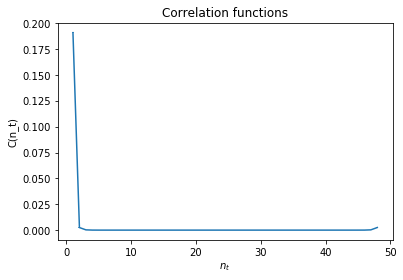

In [11]:
σ_logC = σ / Cavg    #σ_{log(C)} = σ_C / C
plt.figure()
# plt.scatter(n_t, np.log(np.abs(C)))
# plt.errorbar(range(1, n_t + 1), np.log(np.abs(Cavg)), yerr = np.log(σ_logC))
# plt.semilogy(range(1, n_t + 1), np.abs(Cavg))
plt.errorbar(range(1, n_t + 1), np.abs(Cavg), yerr = σ)
plt.title('Correlation functions')
plt.xlabel('$n_t$')
# plt.ylabel('$log(C(n_t))$')
plt.ylabel('C(n_t)')

Text(0, 0.5, '$m_{eff}$')

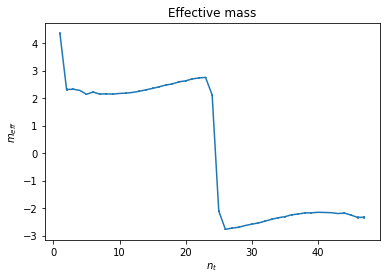

In [12]:
plt.figure()
plt.errorbar(range(1, n_t), m, yerr = σ_m)
plt.title('Effective mass')
plt.xlabel('$n_t$')
plt.ylabel('$m_{eff}$')